Apply Transformations and Visualizations

1. Converted categorical data to numerical data using label encoding.
2. Apply transformations
3. Generate and display plots.

/var/folders/s1/61b5vb6n7_n0wff6fjv_v7gr0000gn/T/ipykernel_6612/1943171785.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots(figsize=(8, 6))
/var/folders/s1/61b5vb6n7_n0wff6fjv_v7gr0000gn/T/ipykernel_6612/1943171785.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plots["cap-color_histogram_kde"].show()


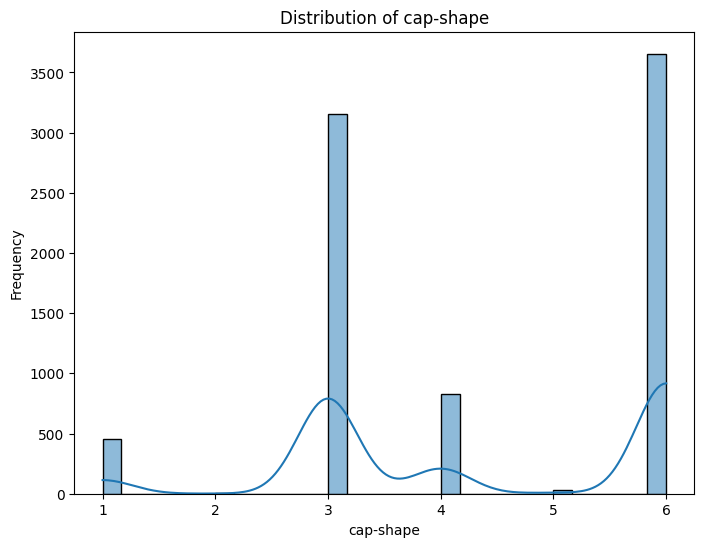

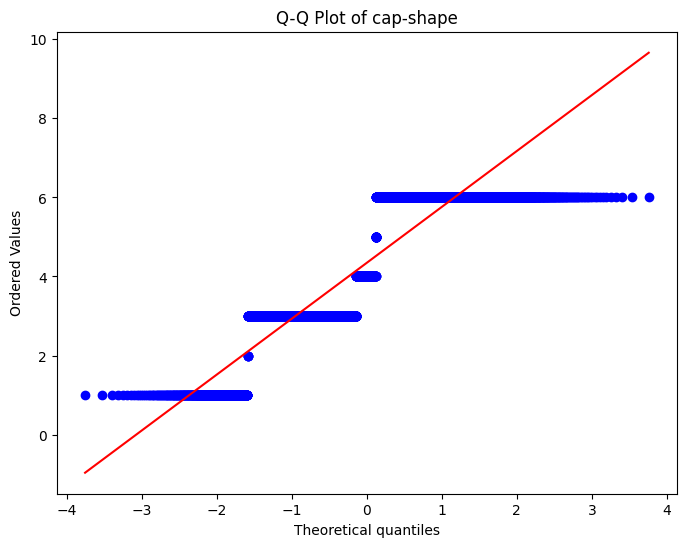

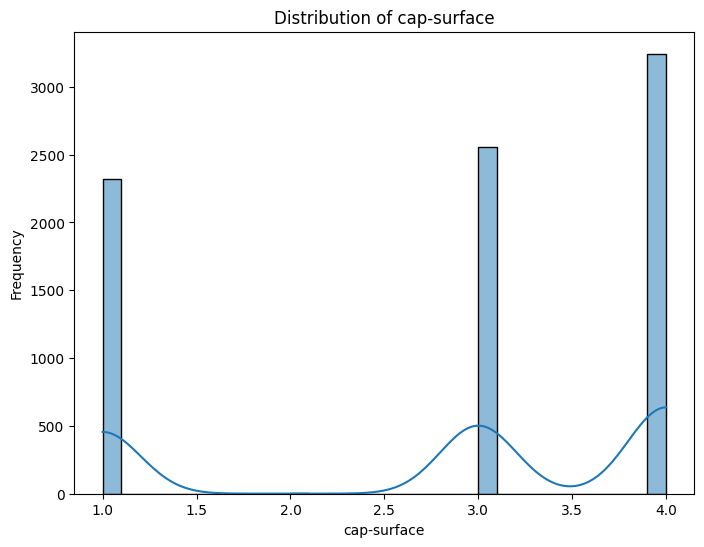

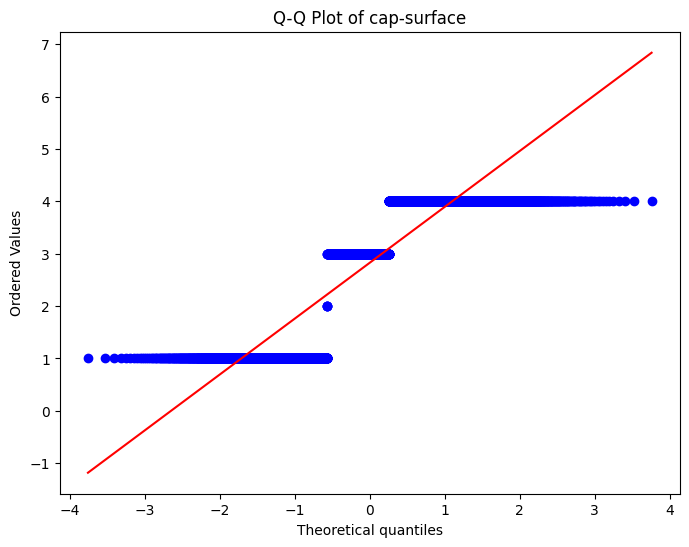

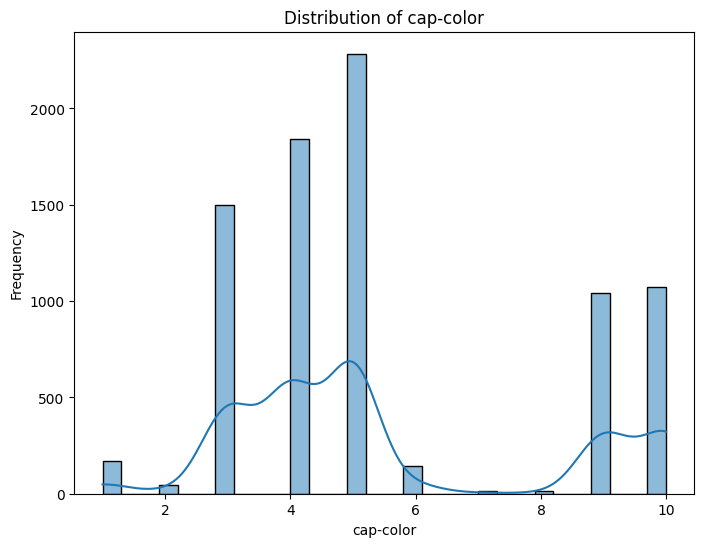

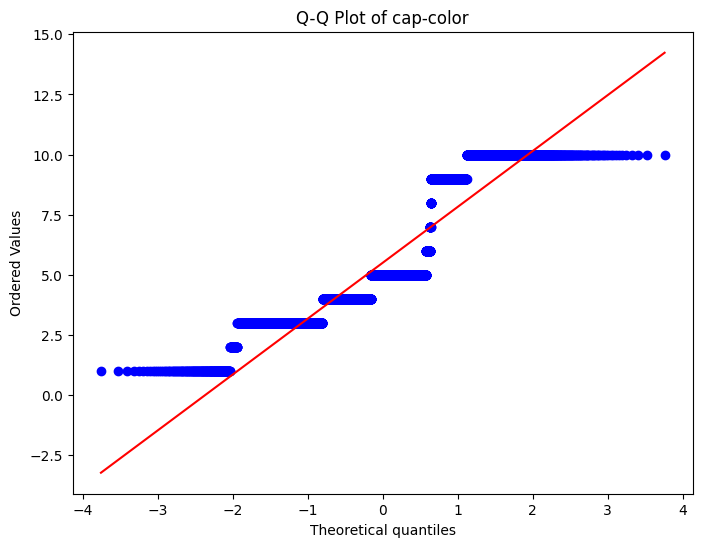

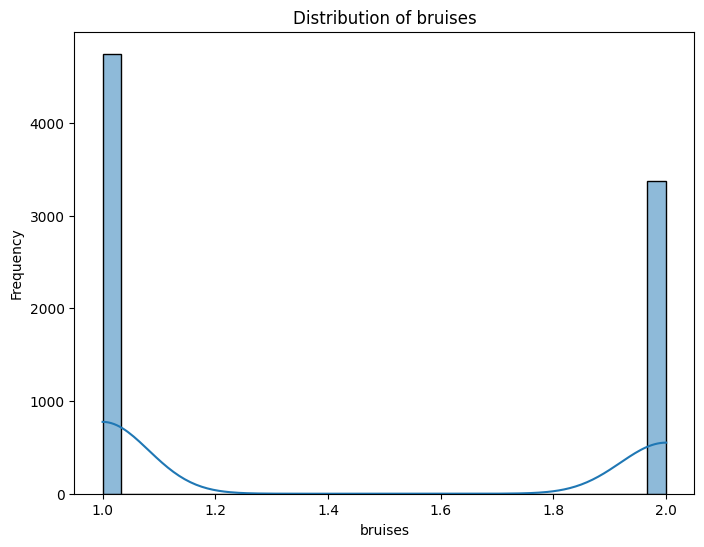

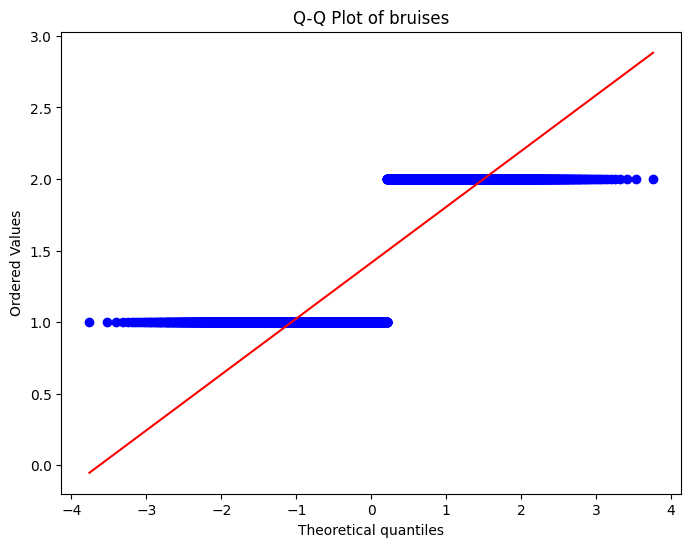

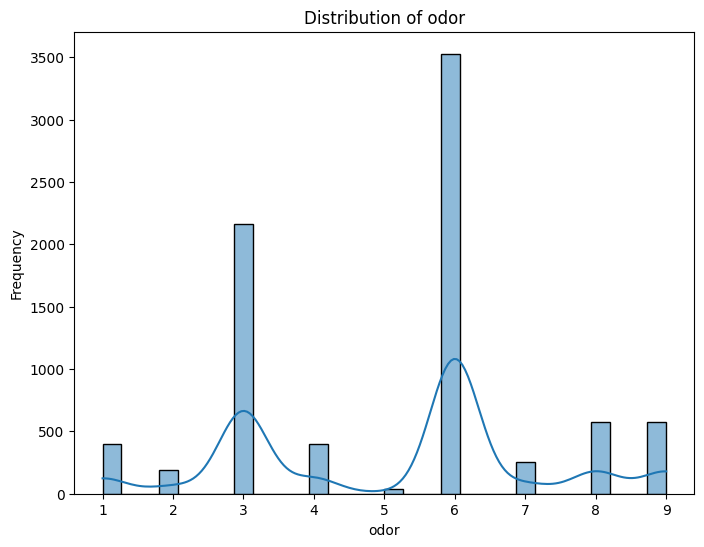

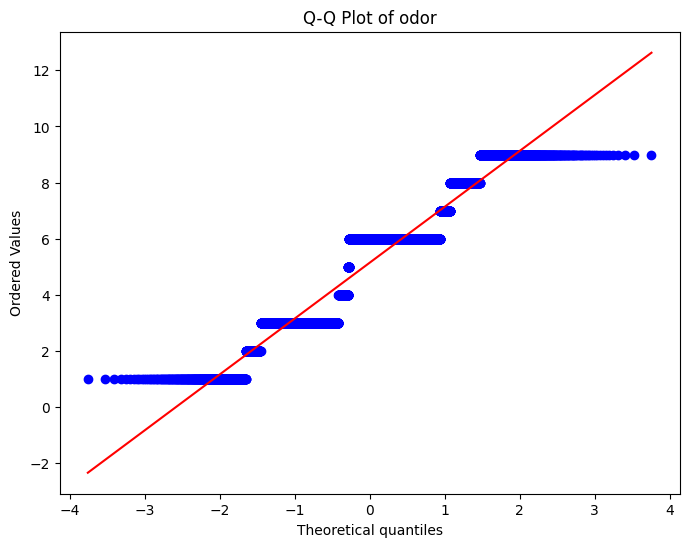

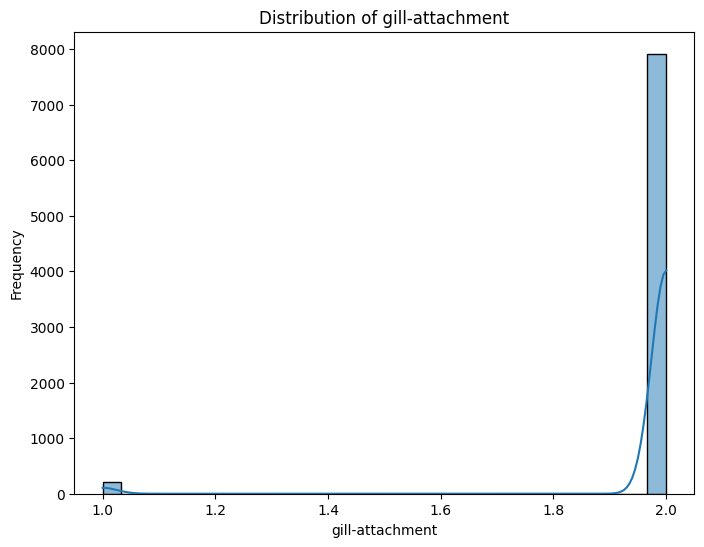

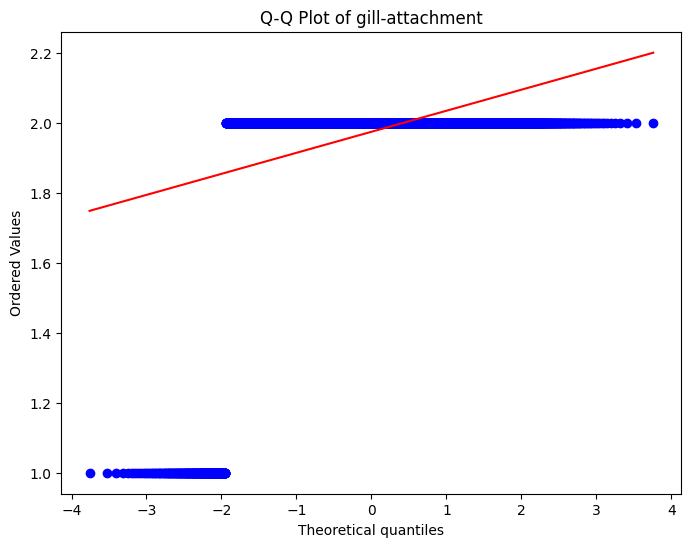

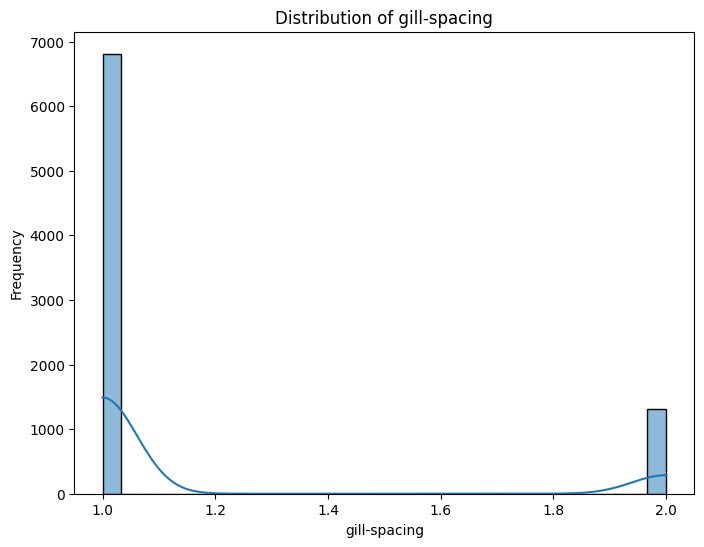

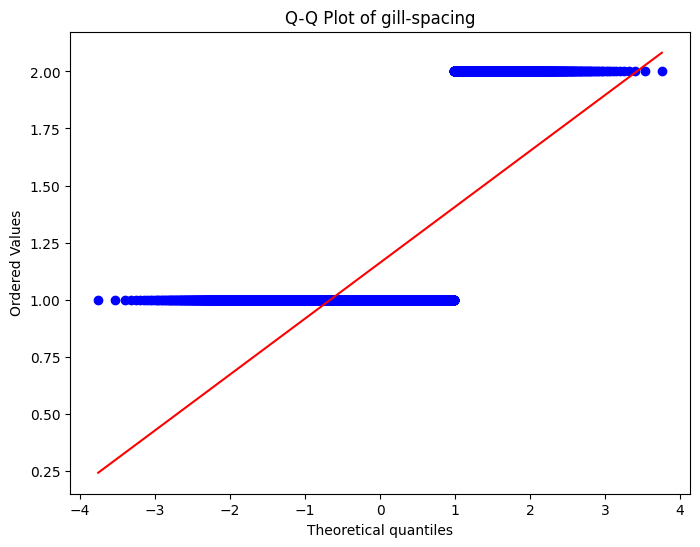

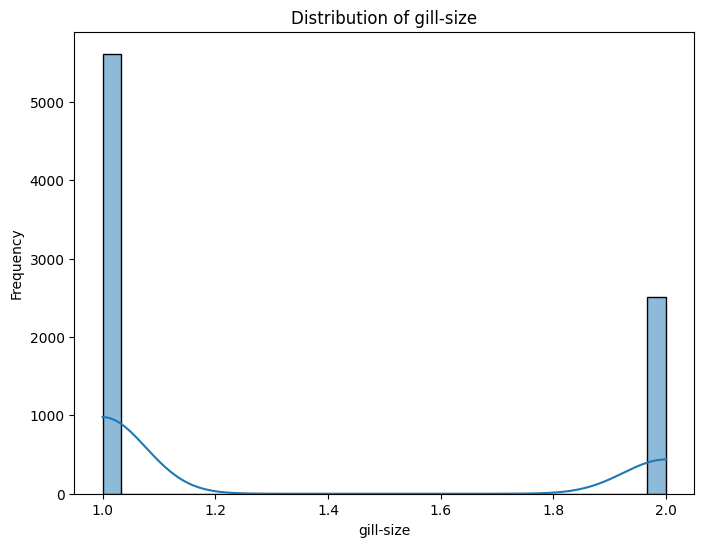

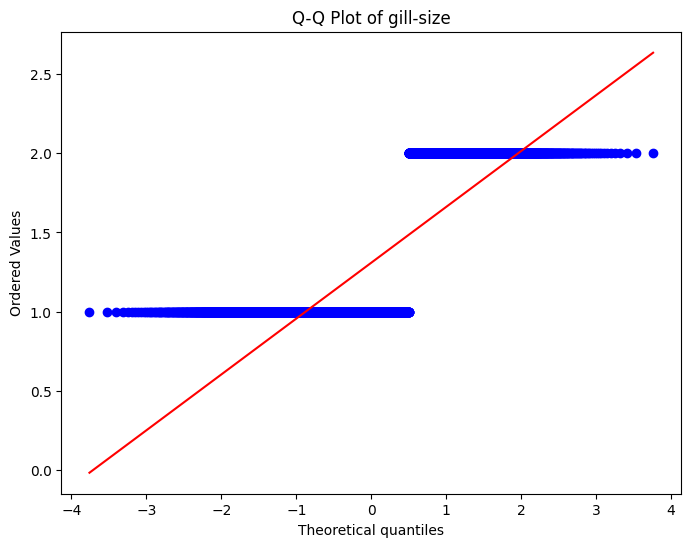

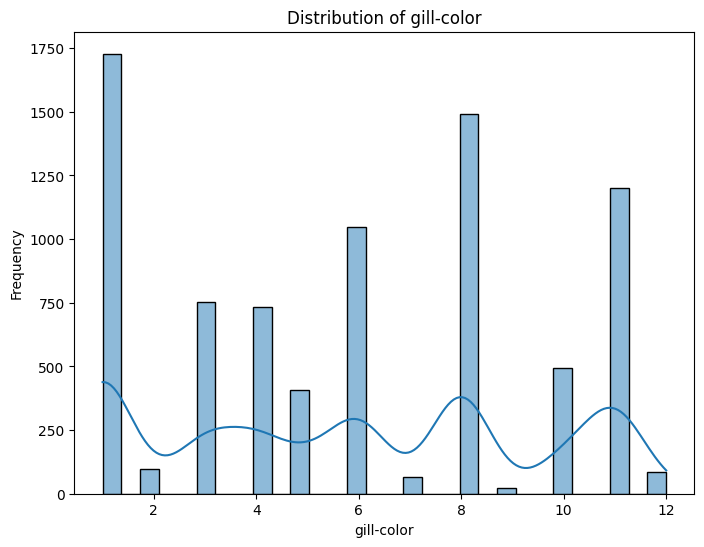

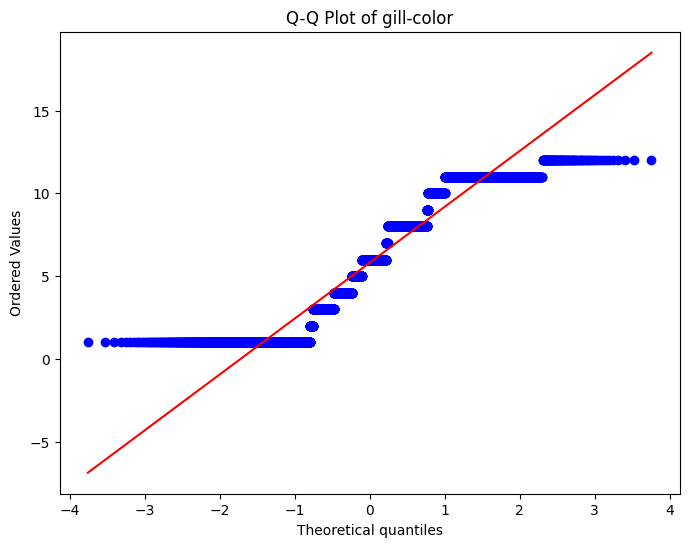

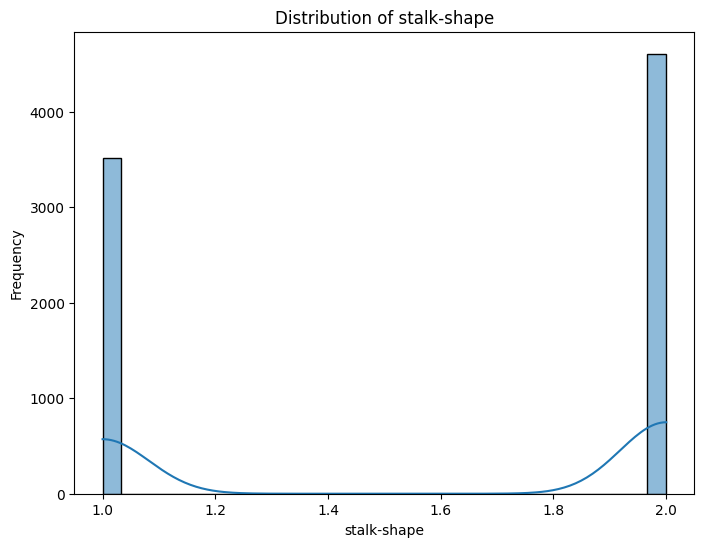

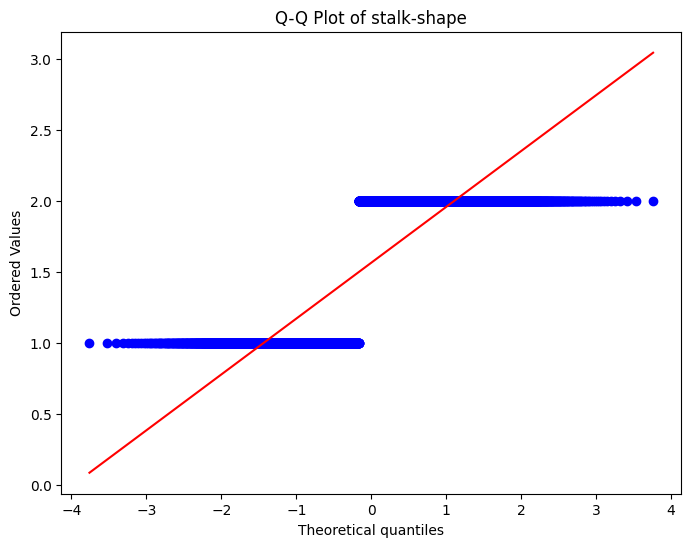

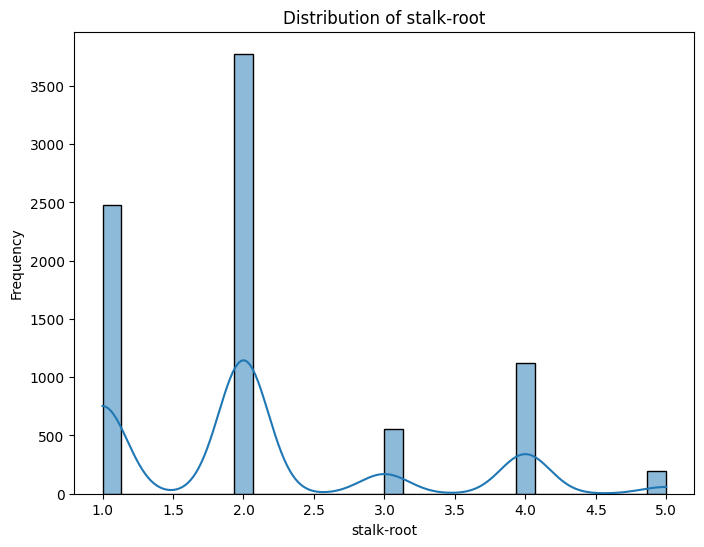

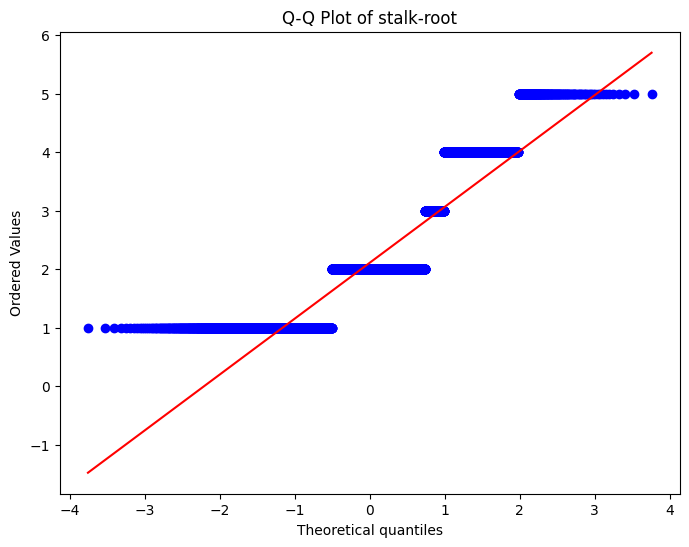

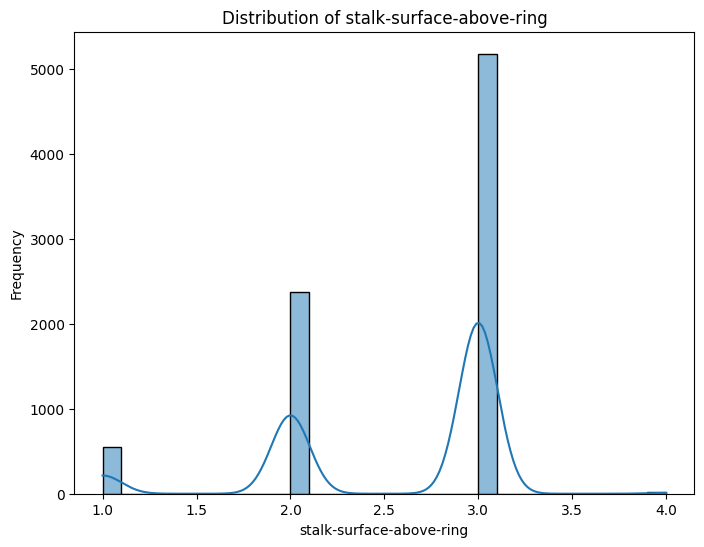

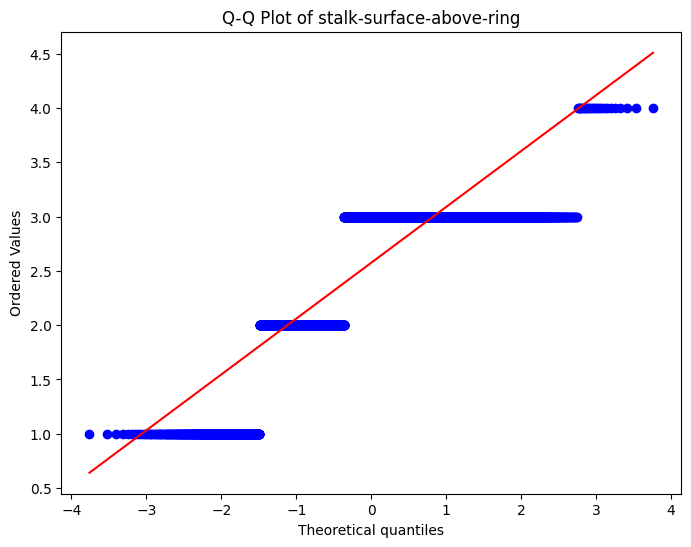

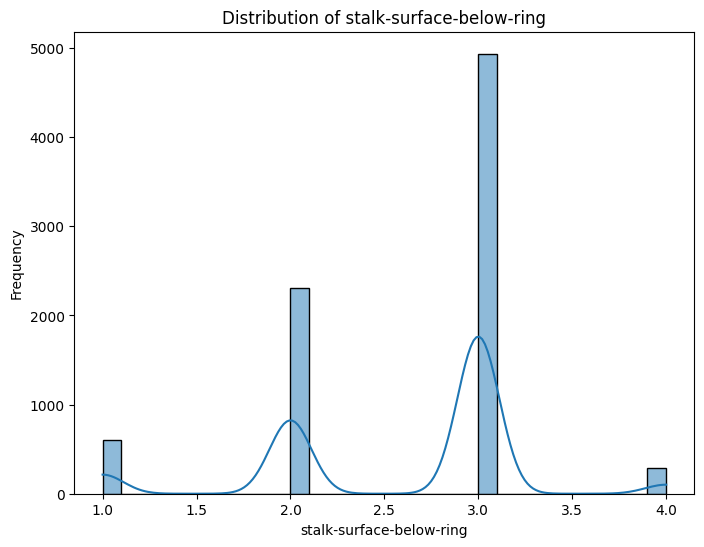

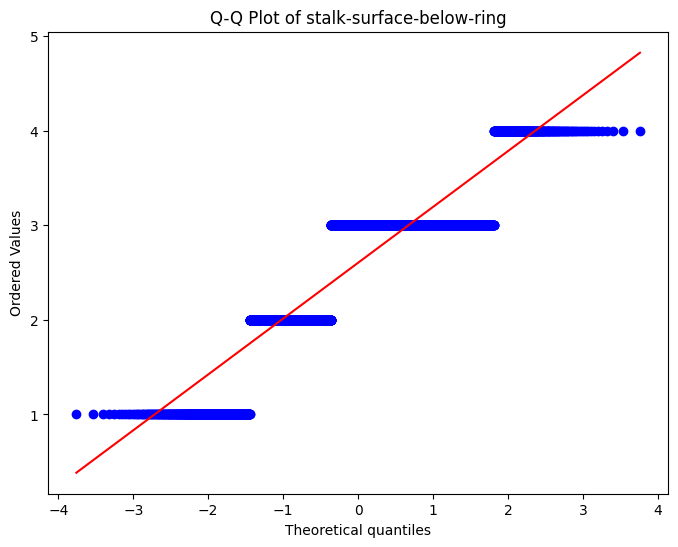

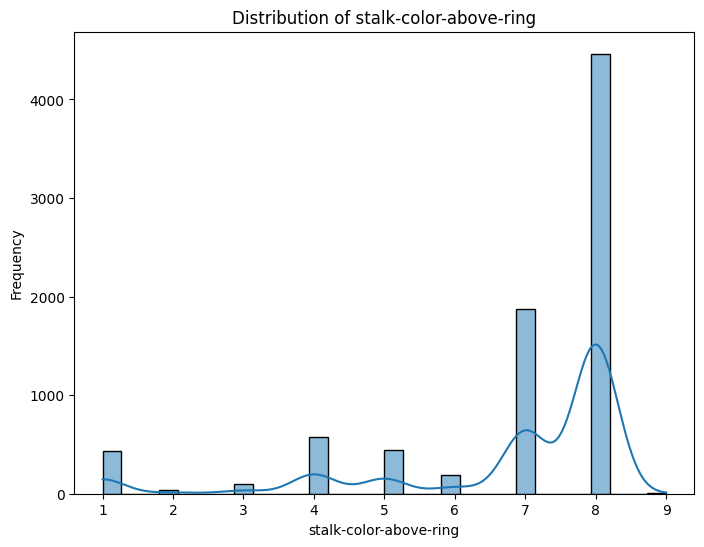

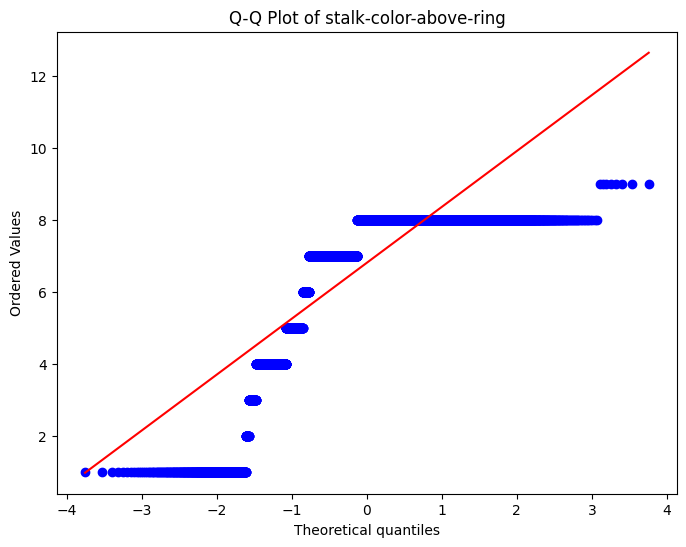

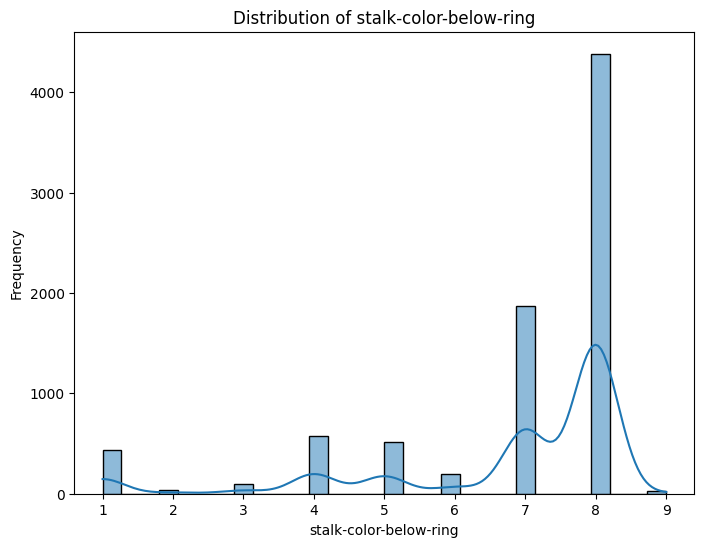

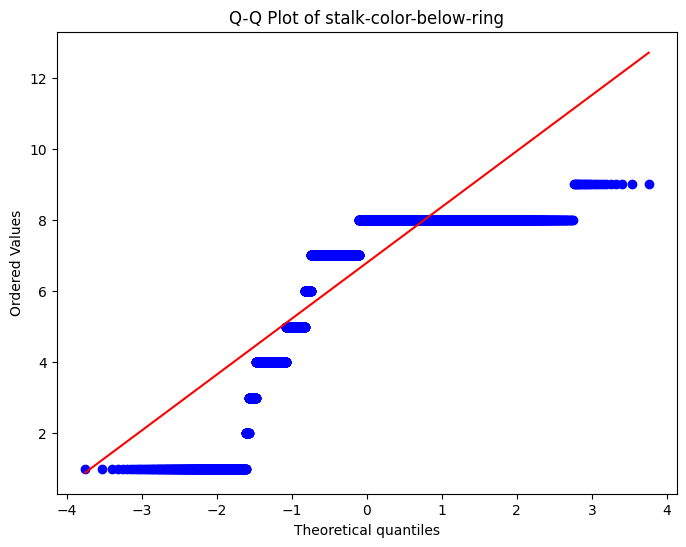

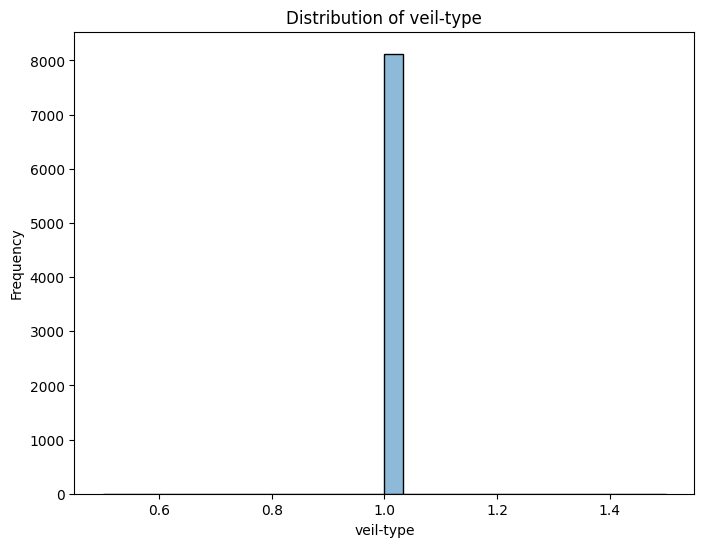

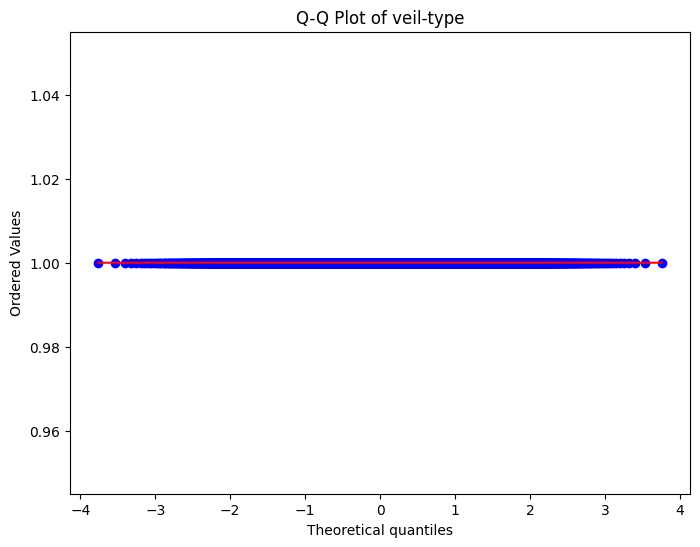

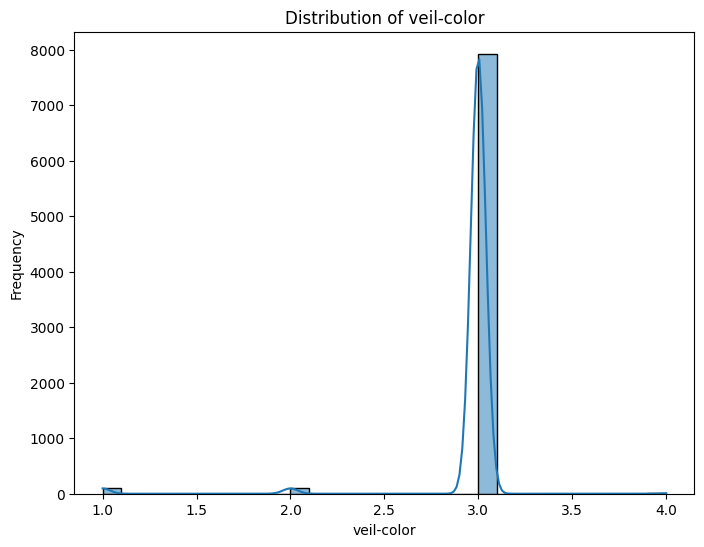

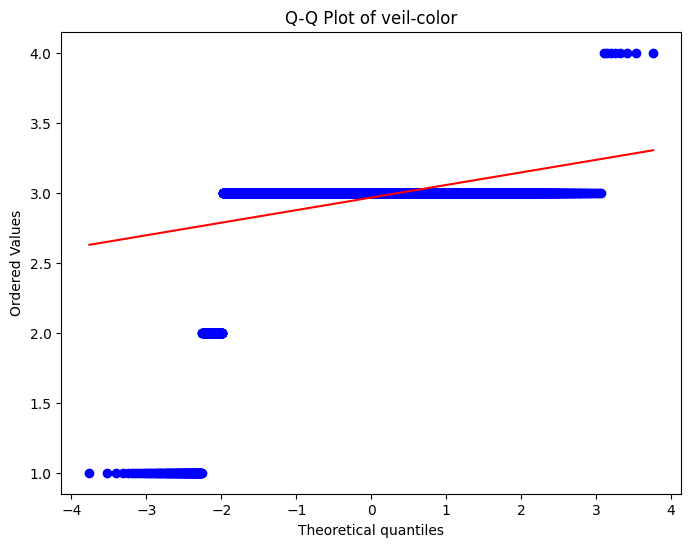

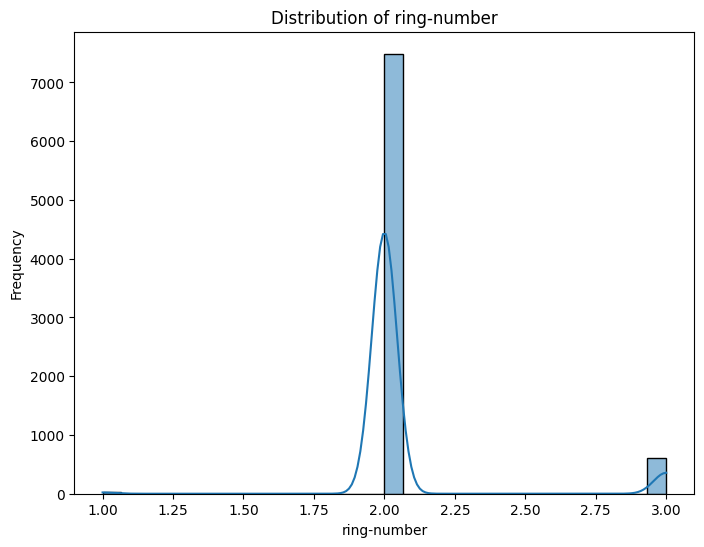

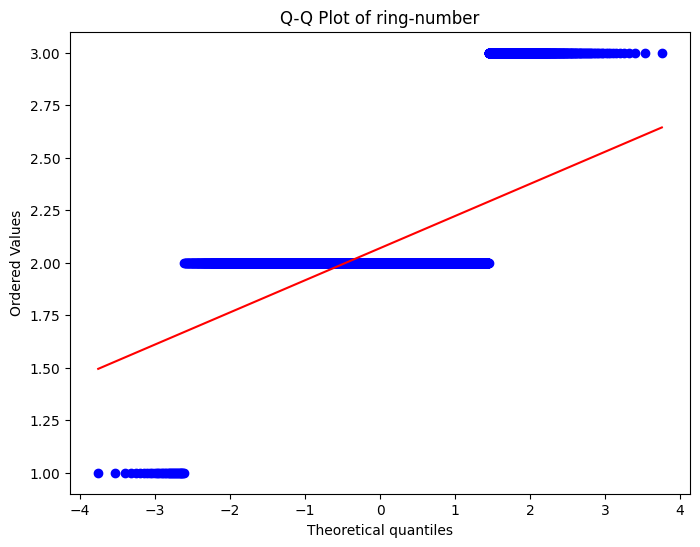

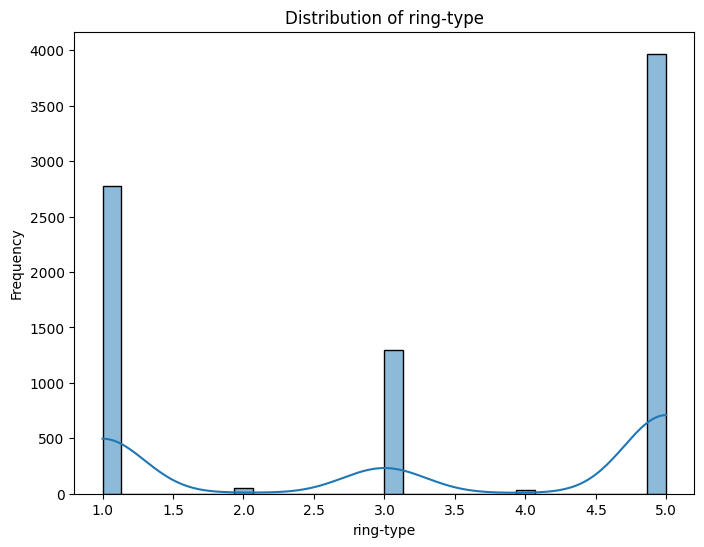

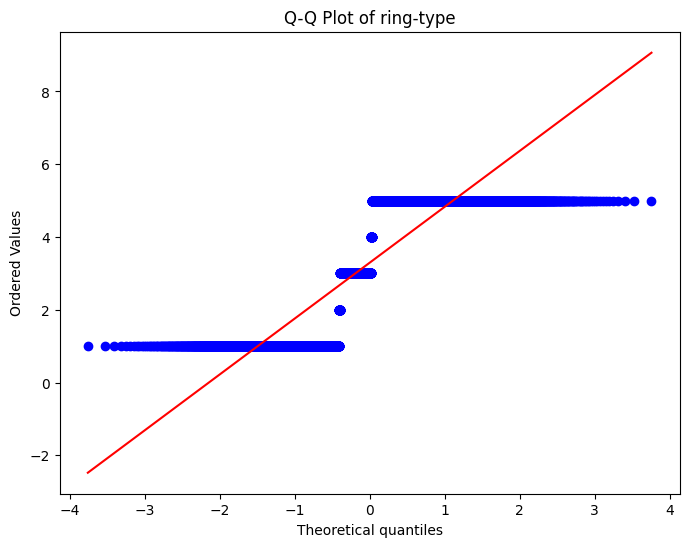

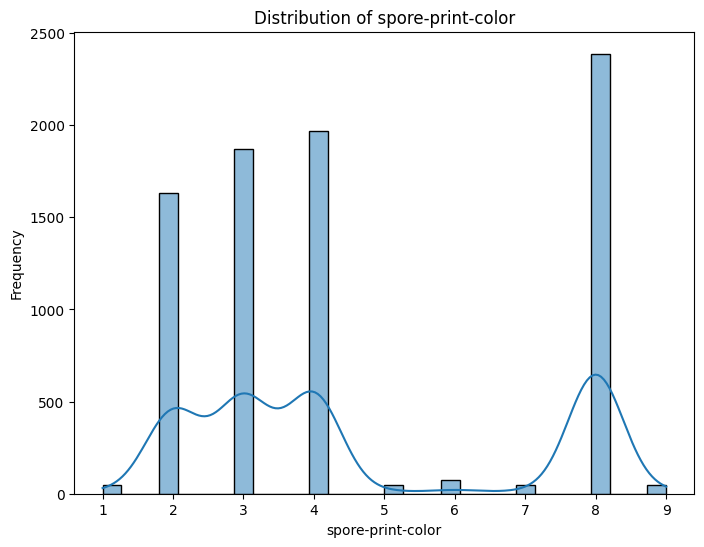

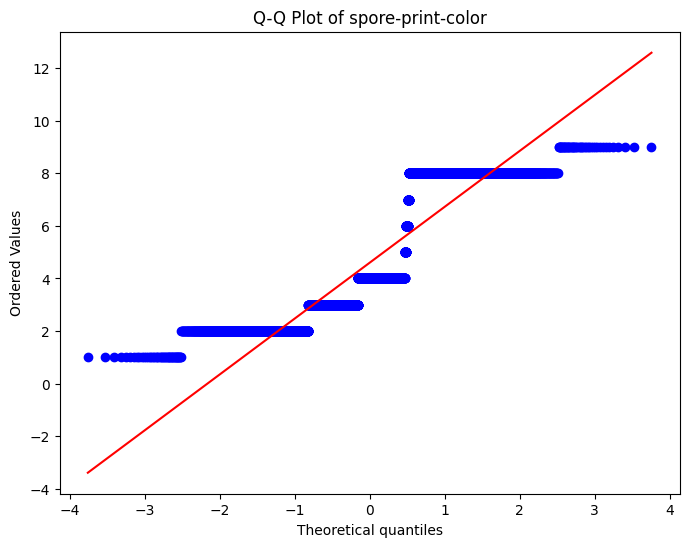

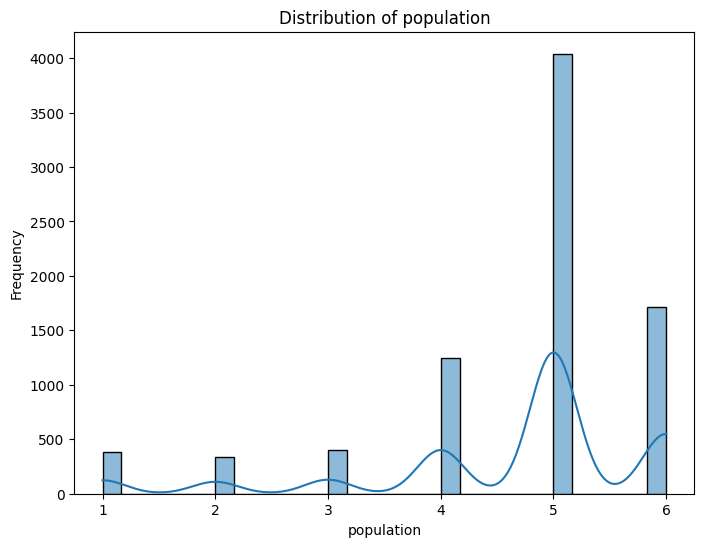

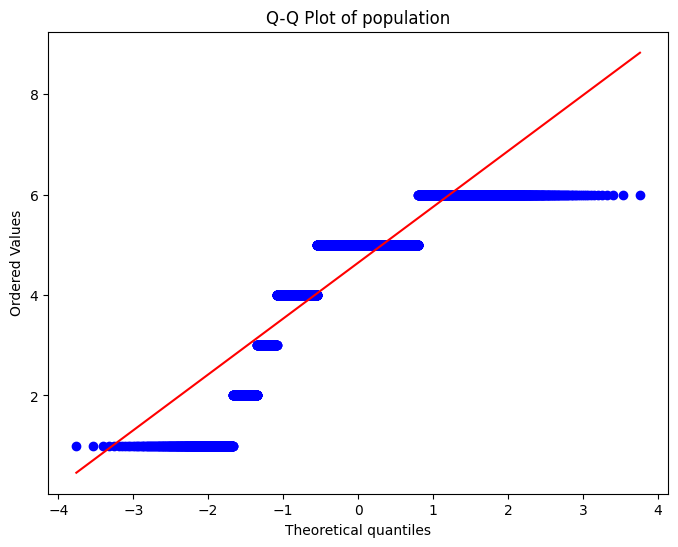

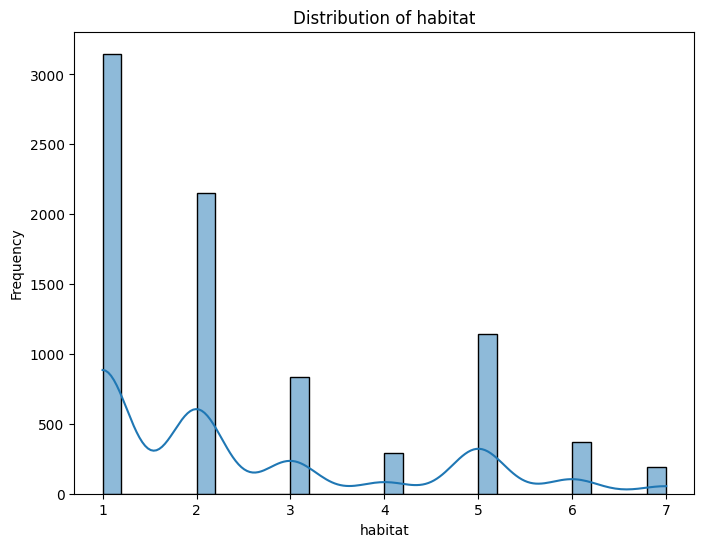

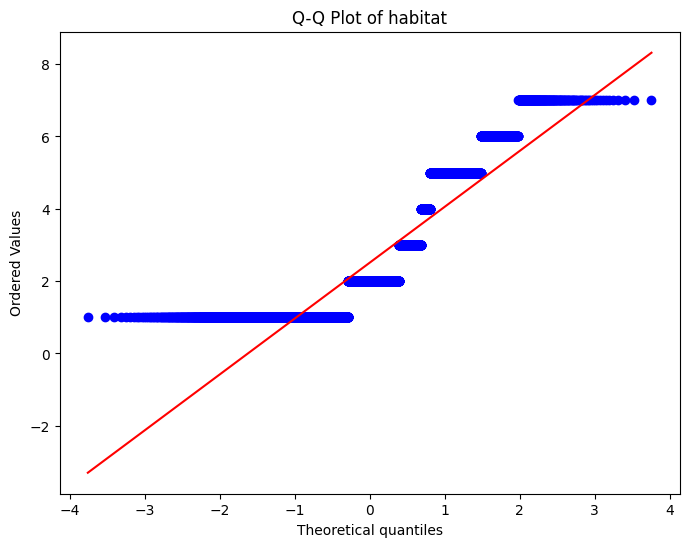

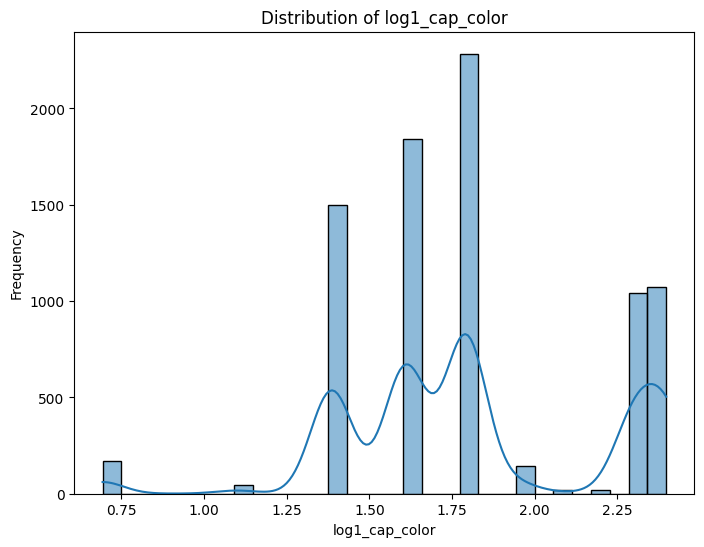

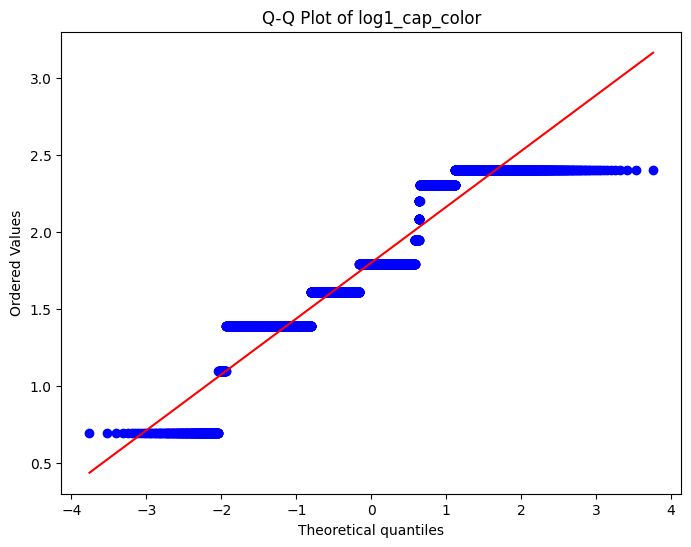

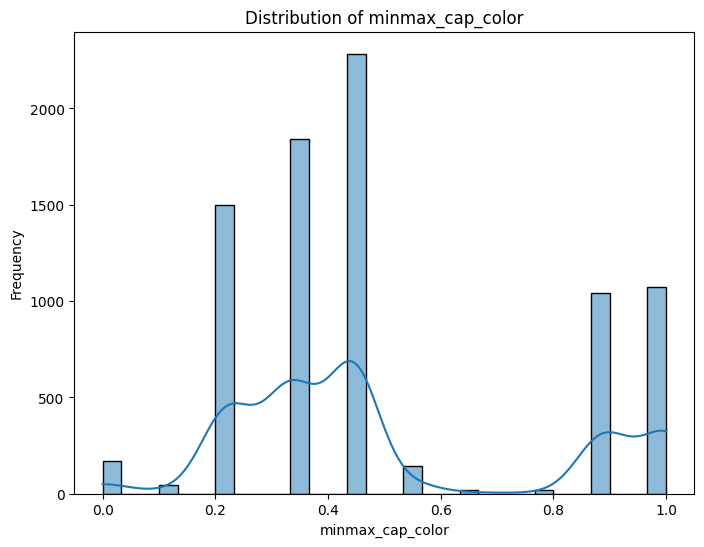

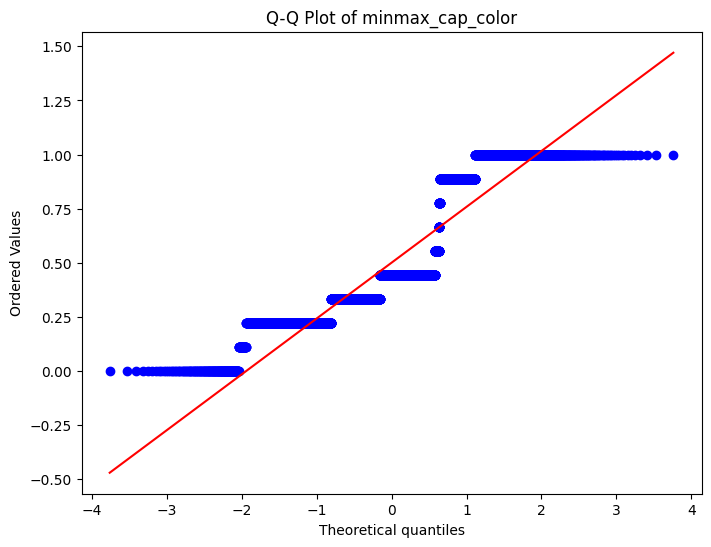

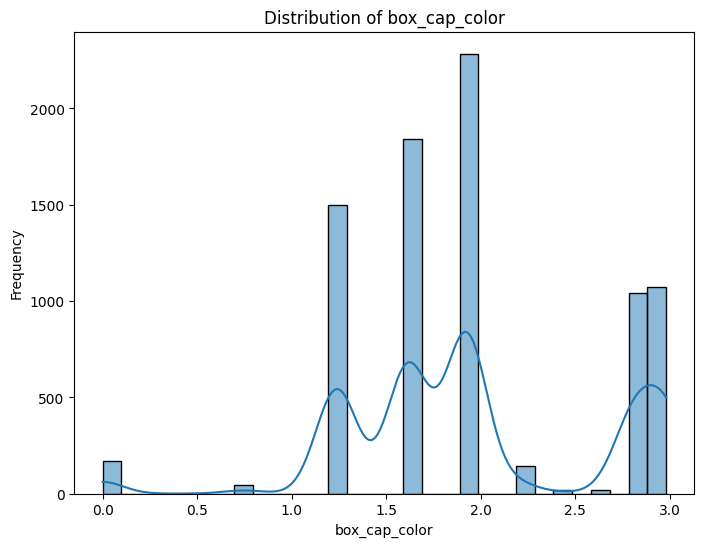

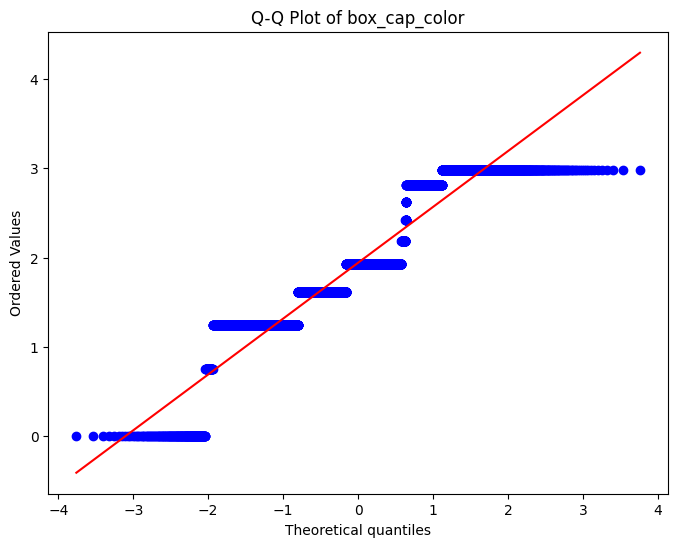

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats

#Load dataset
df = pd.read_csv("/Users/reethighauruthiran/Downloads/mushrooms.csv")

# Encode categorical features into numerical values
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Drop target variable ("class") for feature transformations
df_features = df_encoded.drop(columns=["class"])

# Apply transformations
df_features = df_features + 1  # Avoid log(0) issues
df_features['log1_cap_color'] = np.log1p(df_features['cap-color'])

# Min-Max scaling
scaler = MinMaxScaler()
df_features['minmax_cap_color'] = scaler.fit_transform(df_features[['cap-color']])

# Box-Cox Transformation (requires positive values)
df_features['box_cap_color'], _ = stats.boxcox(df_features['cap-color'])

# Generate and store plots
plots = {}
column_list = df_features.columns

for column in column_list:
    # Histogram and KDE Plot
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    sns.histplot(df_features[column], kde=True, bins=30, ax=ax1)
    ax1.set_title(f"Distribution of {column}")
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')
    plots[f"{column}_histogram_kde"] = fig1  

    # Q-Q Plot
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    stats.probplot(df_features[column], dist="norm", plot=ax2)
    ax2.set_title(f"Q-Q Plot of {column}")
    plots[f"{column}_qq_plot"] = fig2

# Show one example plot
plots["cap-color_histogram_kde"].show()


Applied the Multinomial Naïve Bayes Model

Evaluated performance using:
- Accuracy Score
- Precision, Recall, F1-score, and Support
- ROC AUC Score & Curve

Model Accuracy: 0.8074
              precision    recall  f1-score      support
0              0.751423  0.939502  0.835003   843.000000
1              0.910683  0.664962  0.768662   782.000000
accuracy       0.807385  0.807385  0.807385     0.807385
macro avg      0.831053  0.802232  0.801832  1625.000000
weighted avg   0.828064  0.807385  0.803078  1625.000000


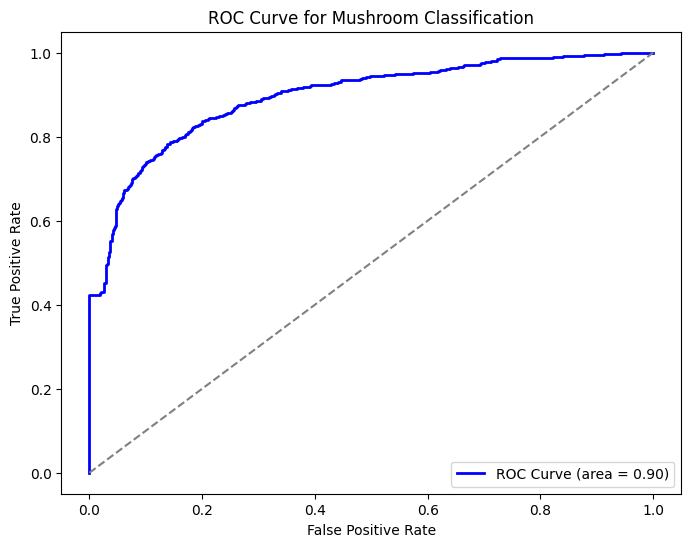

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report, roc_curve, auc)

# Load dataset
df = pd.read_csv("/Users/reethighauruthiran/Downloads/mushrooms.csv")  

# Encode categorical features into numerical values
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Define features (X) and target (y)
X = df_encoded.drop(columns=["class"])  
y = df_encoded["class"]  

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multinomial Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Compute precision, recall, F1-score, and support
report = classification_report(y_test, y_pred, output_dict=True)
print(pd.DataFrame(report).transpose())

# Compute ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Mushroom Classification")
plt.legend(loc="lower right")
plt.show()
